In [1]:
#!/usr/bin/env python
# coding: utf-8

# ### Select the range of recordings for the analysis (see "Number" row in the meta data file)

# In[4]:
rec = [x for x in range(0,198)]  #198


# In[1]:

import numpy as np

import numpy.ma as ma

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import pandas as pd
import seaborn as sns
import pickle
import os

sns.set()
sns.set_style("whitegrid")

from scipy.signal import medfilt 

from scipy.stats import skew, kurtosis, zscore

from scipy import signal

from sklearn.linear_model import LinearRegression, TheilSenRegressor


plt.rcParams['figure.figsize'] = [8, 8]


# In[2]:


from capipeline import *





/media/andrey/My Passport/OASIS-master/oasis/functions.py:13: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  warn("Could not find cvxpy. Don't worry, you can still use OASIS, " +


In [2]:
database_path = '/media/andrey/My Passport/GIN/Anesthesia_CA1/meta_data/meta_recordings_transition_state.xlsx'

Reconrding #  0
-1.0
11.0
['0', ' 7500']
Reconrding #  1
-1.0
1.0
['0', ' 9000']
Reconrding #  2
-2.0
9.0
['0', ' 6500']
Reconrding #  3
-2.0
10.0
['0', ' 5000']
Reconrding #  4
-1.0
12.0
['3000', ' 11000']
Reconrding #  5
-2.0
10.0
['0', ' 7000']
Reconrding #  6
-1.0
7.0
['0', ' 14770']
Reconrding #  7
-2.0
11.0
['0', ' 8000']
Reconrding #  8
-2.0
9.0
['0', ' 8000']
Reconrding #  9
-50.0
46.0
['2000', ' 7000']
Reconrding #  10
-1.0
0.0
['0', ' 9000']
Reconrding #  11
0.0
2.0
['0', ' 10000']
Reconrding #  12
-3.0
3.0
['0', ' 8000']
Reconrding #  13
-3.0
10.0
['0', ' 18000']
Reconrding #  14
-5.0
32.0
['1000', ' 6500']
Reconrding #  15
-2.0
40.0
['3000', ' 10000']
Reconrding #  16
-4.0
9.0
['1000', ' 10000']
Reconrding #  17
-2.0
8.0
['0', ' 8000']
Reconrding #  18
-2.0
12.0
['0', '5000']
Reconrding #  19
0.0
0.0
['0', ' 9000']
Reconrding #  20
-3.0
9.0
['2100', ' 7100']
Reconrding #  21
-4.0
8.0
['4000', ' 11000']
Reconrding #  22
-4.0
16.0
['10500', ' 16000']
Reconrding #  23
-2.0
4.0

-3.0
4.0
['0', ' 8437']
Reconrding #  191
-1.0
1.0
['0', ' 18000']
Reconrding #  192
-3.0
7.0
['0', ' 18000']
Reconrding #  193
-2.0
4.0
['0', ' 18000']
Reconrding #  194
-3.0
2.0
['0', ' 16374']
Reconrding #  195
-13.0
12.0
['0', ' 12255']
Reconrding #  196
-4.0
5.0
['0', ' 18000']
Reconrding #  197
-4.0
5.0
['0', ' 15623']
50.0
-50.0


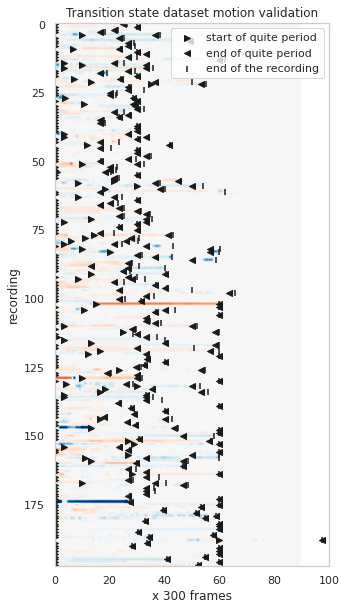

In [3]:

motion_index = np.zeros((len(rec),100000),dtype='float')

recording_length = np.zeros((len(rec)),dtype='int')

start_quiet_period = np.zeros((len(rec)),dtype='int')

stop_quiet_period = np.zeros((len(rec)),dtype='int')


for i, r in enumerate(rec):

    print("Reconrding # ", r)
    
    animal = get_animal_from_recording(r, database_path)
        
    #condition = get_condition(r, database_path)
    
    #print("#" +  str(r) + " " + str(animal) + " " + str(condition) + " ")

    meta_data = pd.read_excel(database_path)
 
    path_excel_rec = str(meta_data['Folder'][r]) + str(meta_data['Subfolder'][r])  + str(meta_data['Recording idx'][r]) + '/suite2p/'

    stat = np.load(path_excel_rec+ '/plane0/ops.npy', allow_pickle=True)

    #plt.plot(stat.item(0)['yoff'],alpha=0.5)
    #plt.plot(stat.item(0)['xoff'],alpha=0.5)

    motion_index[i,:len(stat.item(0)['yoff'])] = stat.item(0)['yoff']

    print(min(motion_index[i,:]))
    print(max(motion_index[i,:]))

    recording_length[i] = len(stat.item(0)['yoff'])
    print(meta_data['Quiet periods'][r].split(','))
    start_quiet_period[i] = int(meta_data['Quiet periods'][r].split(',')[0])
    stop_quiet_period[i] = int(meta_data['Quiet periods'][r].split(',')[1])


#np.save("./xy-motion.npy",motion_index)

mi = motion_index

#mi = np.load("./xy-motion.npy")

print(np.max(mi))

print(np.min(mi))


mi_av = np.mean(mi[:,:27000].reshape(mi.shape[0],90,300), axis=2)


In [ ]:

plt.rcParams["axes.grid"] = False

plt.figure(figsize = (15,10))

plt.imshow(mi_av,cmap='RdBu',vmin = -10, vmax = 10,aspect='equal')

plt.scatter(start_quiet_period[0:len(rec)]/300,np.arange(len(rec)),marker='>',color='k',label='start of quite period')

plt.scatter(stop_quiet_period[0:len(rec)]/300,np.arange(len(rec)),marker='<',color='k',label='end of quite period')

plt.scatter(recording_length[0:len(rec)]/300, np.arange(len(rec)) ,marker='|',color='k',label='end of the recording')

plt.legend()

plt.xlabel('x 300 frames')
plt.ylabel('recording')

plt.title('Transition state dataset motion validation')

#plt.gcf().set_facecolor("white")

plt.xlim([0,100])

plt.savefig("Validation_motion.png")
plt.savefig("Validation_motion.svg")

#import plotly.express as px
#import numpy as np

#fig = px.imshow(mi, color_continuous_scale='RdBu_r',zmin = -10, zmax = 10)
#fig.show()


plt.show()
